In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
ny = pd.read_csv('Hate_Crimes_by_County_and_Bias_Type__Beginning_2010.csv')
ny['Year'] = pd.to_datetime(ny['Year'], format = '%Y')

# <h1><center> Hate Crimes in NY State, by Biases, History, Location, and Crime types</center></h1>
## <h1><center> Ther period of 2010 - 2019</center></h1>

## In NY state, for the period of 2010-2018, the state recorded 5975 hate crimes against persons and property, targetting people from difrrient races, sexes, faiths, and sexuall orientations.

[Text(0.5, 1.0, 'NY Hate Crimes'), Text(0, 0.5, 'Incidints')]

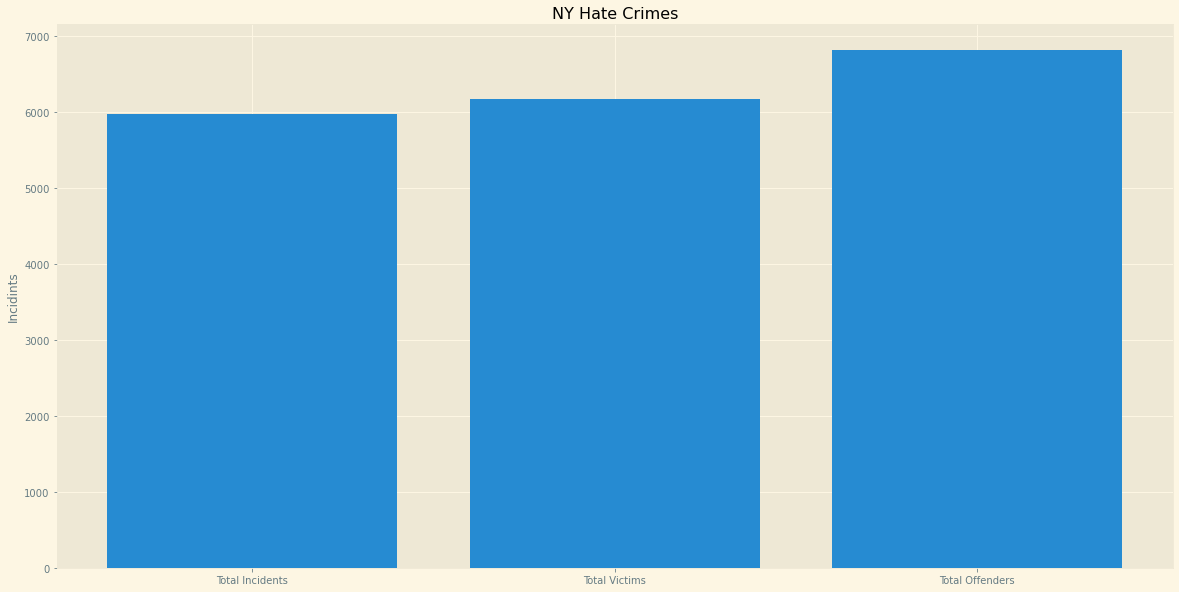

In [3]:
plt.style.use('Solarize_Light2')
hc_count = ny[['Total Incidents', 'Total Victims','Total Offenders']].sum()
fig, ax = plt.subplots(figsize=(20, 10))
x = list(hc_count)
y = list(hc_count.keys())
ax.bar(y, x)
ax.set( title='NY Hate Crimes', ylabel='Incidints')


## 47.6% percent of the total hate crimes recorded was against persons, 52.4%  people properties. 

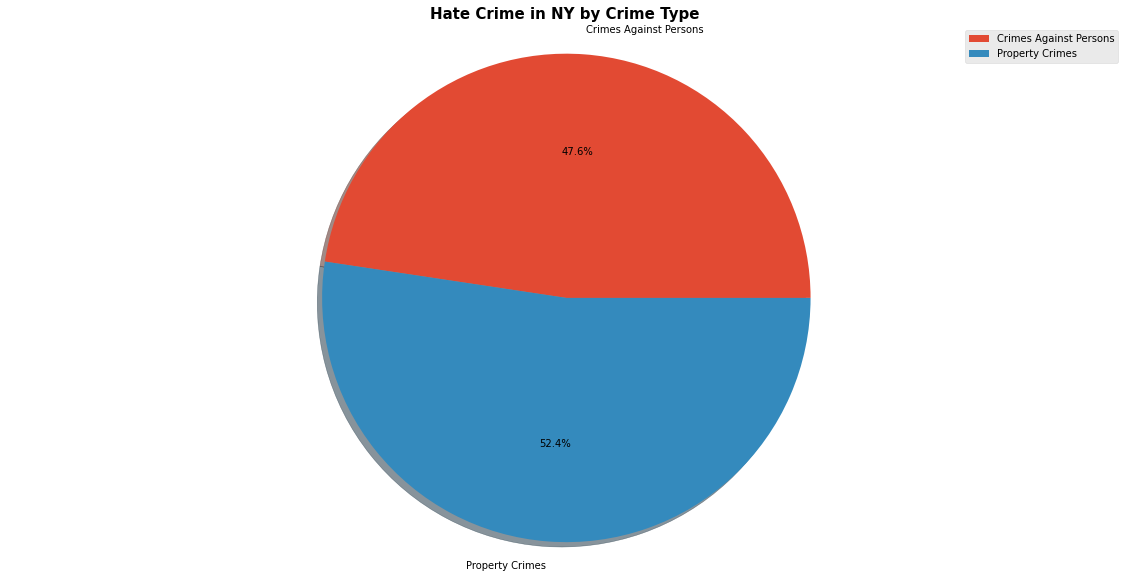

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Crimes Against Persons', 'Property Crimes'
sizes = 2845,3129

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.title("Hate Crime in NY by Crime Type", fontsize = 15, fontweight="bold")
plt.show()

# Over the years, the crimes rate in NY was unstable, some years witnessed higher crimes than the other. 

Text(0.5, 1.0, 'Hate Crime in NY by Year & Crime Type')

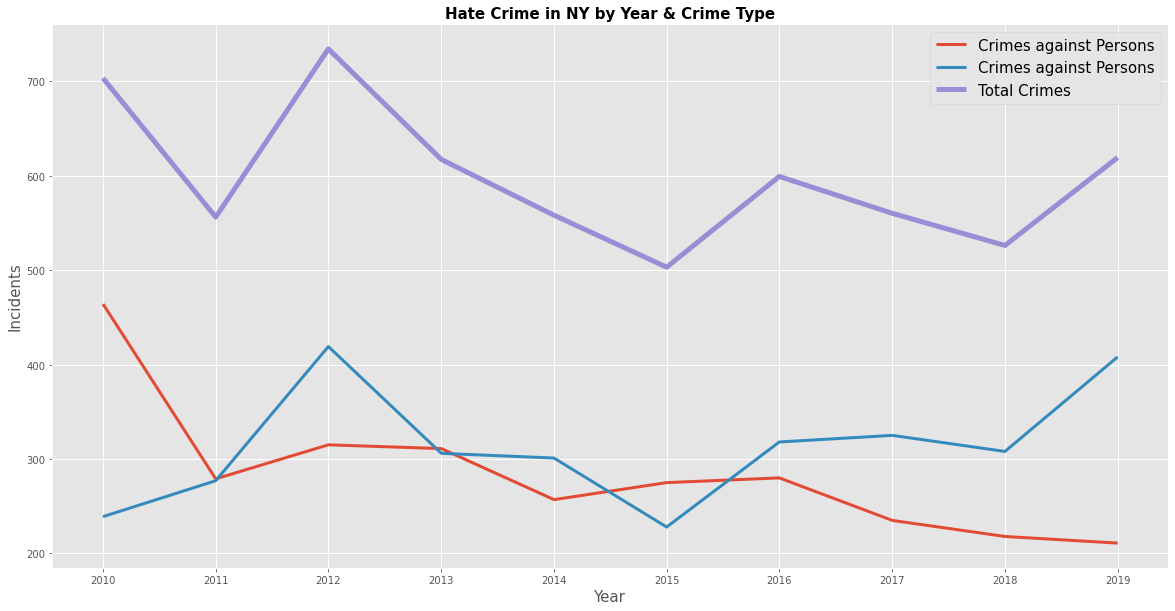

In [5]:
hc_date = ny[['Year', 'Total Incidents']].groupby('Year').sum().reset_index()
total_crimes =hc_date['Total Incidents']
person_filt = ny['Crime Type']== "Crimes Against Persons"
hc_persons = ny[person_filt]
total_person = hc_persons[['Year', 'Total Incidents']].groupby('Year').sum().reset_index()[['Total Incidents']]
property_filt = ny['Crime Type']== "Property Crimes"
hc_property = ny[property_filt]
total_property = hc_property[['Year', 'Total Incidents']].groupby('Year').sum().reset_index()[['Total Incidents']]
x = list(hc_date['Year'])
y = list(total_person['Total Incidents'])
plt.figure(figsize=(20,10))
plt.plot(x,y, label = 'Crimes against Persons',  linewidth = 3)
m = list(total_property['Total Incidents'])
plt.plot(x,m, label = 'Crimes against Persons',  linewidth = 3)
z = list(total_crimes)
plt.plot(x,z, label = 'Total Crimes',  linewidth = 5)
plt.ylabel("Incidents", fontsize = 15)
plt.xlabel("Year",fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Hate Crime in NY by Year & Crime Type", fontsize = 15, fontweight="bold")

## Highest and lowest NY state counties recording hate crimes

<AxesSubplot:title={'center':'Lowest 10 Counties'}, xlabel='County'>

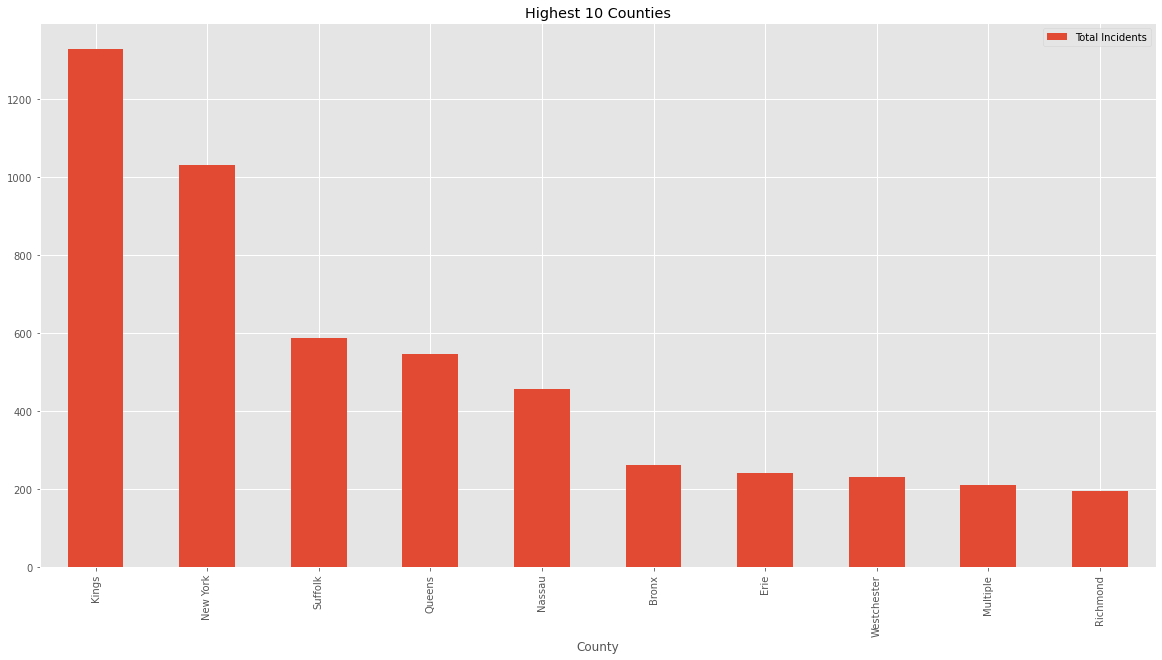

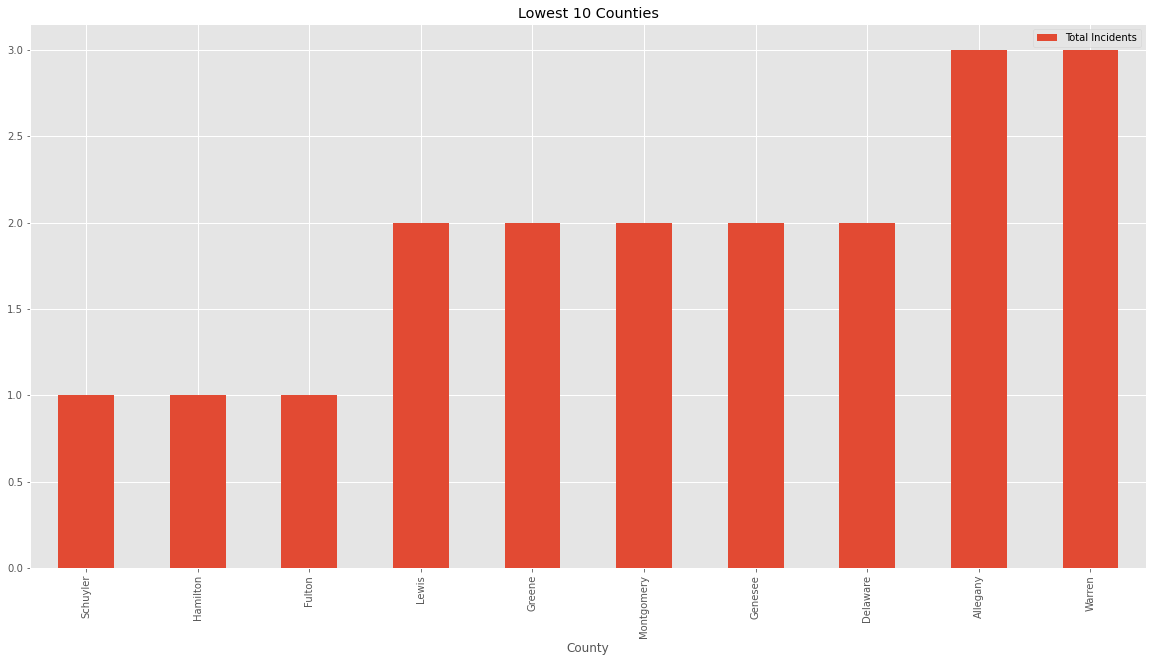

In [6]:
ny[['County', 'Total Incidents']].groupby('County').sum().sort_values(by = 'Total Incidents', ascending = False).head(10).plot(kind = 'bar', figsize = (20,10), title = "Highest 10 Counties")
ny[['County', 'Total Incidents']].groupby('County').sum().sort_values(by = 'Total Incidents', ascending = True).head(10).plot(kind = 'bar', figsize = (20,10), title = "Lowest 10 Counties")


## Race-based hate crimes were the highest in numbers for the period, followed by Sexual Orientation, Gender, and other biases-based hate crimes such as anti-age or anti physical or mental disability.


[Text(0.5, 1.0, 'NY Hate Crimes By Biases'),
 Text(0, 0.5, 'Incidints'),
 Text(0.5, 0, 'Biases')]

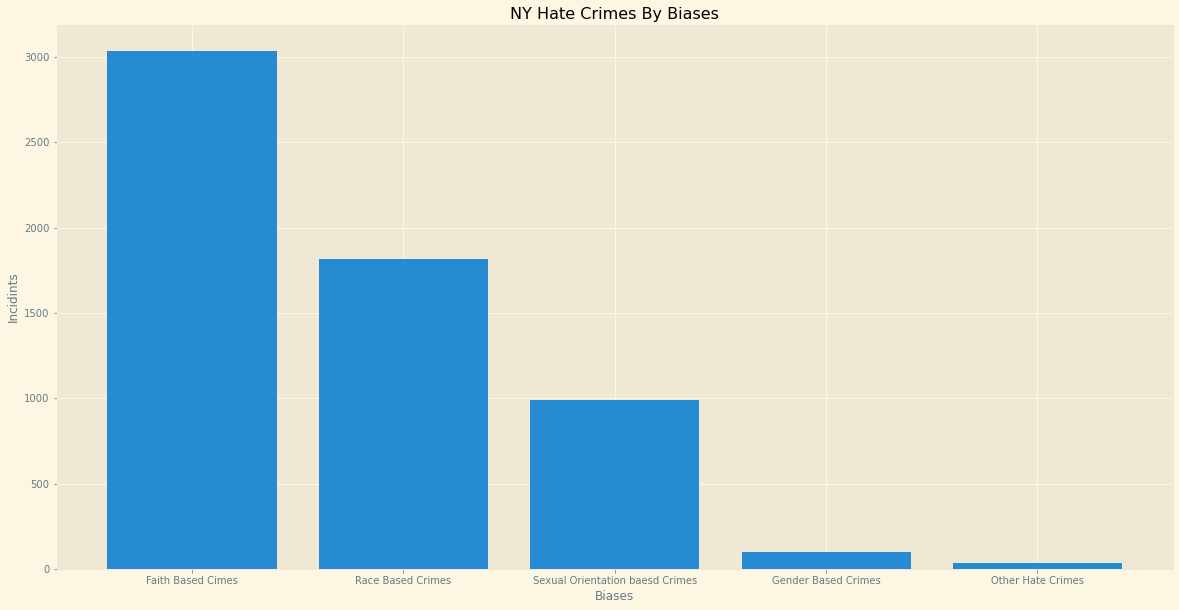

In [7]:
total_sexual = ny[['Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual']].sum().sum()
total_gender =  ny[['Anti-Male', 'Anti-Female',
       'Anti-Transgender','Anti-Gender Identity Expression']].sum().sum()
total_race = ny[['Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Native Hawaiian/Pacific Islander',
       'Anti-Multi-Racial Groups', 'Anti-Other Race','Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Non-Hispanic*']].sum().sum()
total_other=ny[['Anti-Age*','Anti-Physical Disability',
       'Anti-Mental Disability']].sum().sum()
total_faith = ny[['Anti-Jewish','Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Atheism/Agnosticism',
       'Anti-Religious Practice Generally', 'Anti-Other Religion',
       'Anti-Buddhist', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Other Christian', 'Anti-Sikh']].sum().sum()
plt.style.use('Solarize_Light2')
fig,ax = plt.subplots(figsize=(20, 10))
x = ["Faith Based Cimes","Race Based Crimes","Sexual Orientation baesd Crimes", "Gender Based Crimes",  "Other Hate Crimes"]
y = [total_faith,total_race,total_sexual,total_gender,total_other]
ax.bar(x, y)
ax.set(title='NY Hate Crimes By Biases', ylabel='Incidints', xlabel = "Biases")

# Faith / Religion Based Hate Crimes

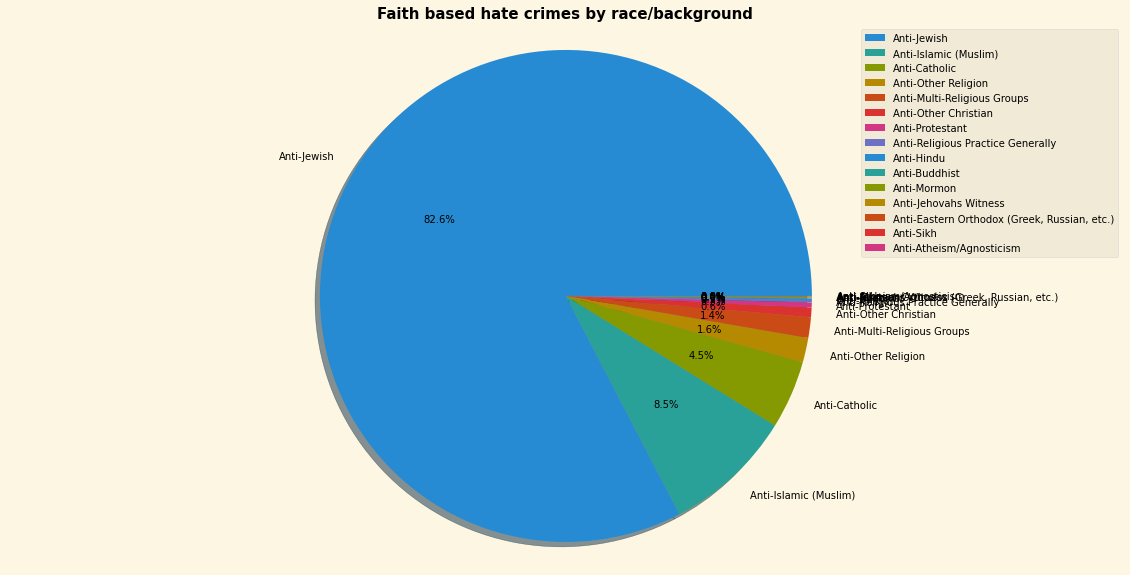

In [8]:
faith = ny[['Anti-Jewish','Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Atheism/Agnosticism',
       'Anti-Religious Practice Generally', 'Anti-Other Religion',
       'Anti-Buddhist', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Other Christian', 'Anti-Sikh']].sum().sort_values(ascending =  False)
labels = list(faith.keys())
sizes = list(faith)
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Faith based hate crimes by race/background", fontsize = 15, fontweight="bold")
plt.show()

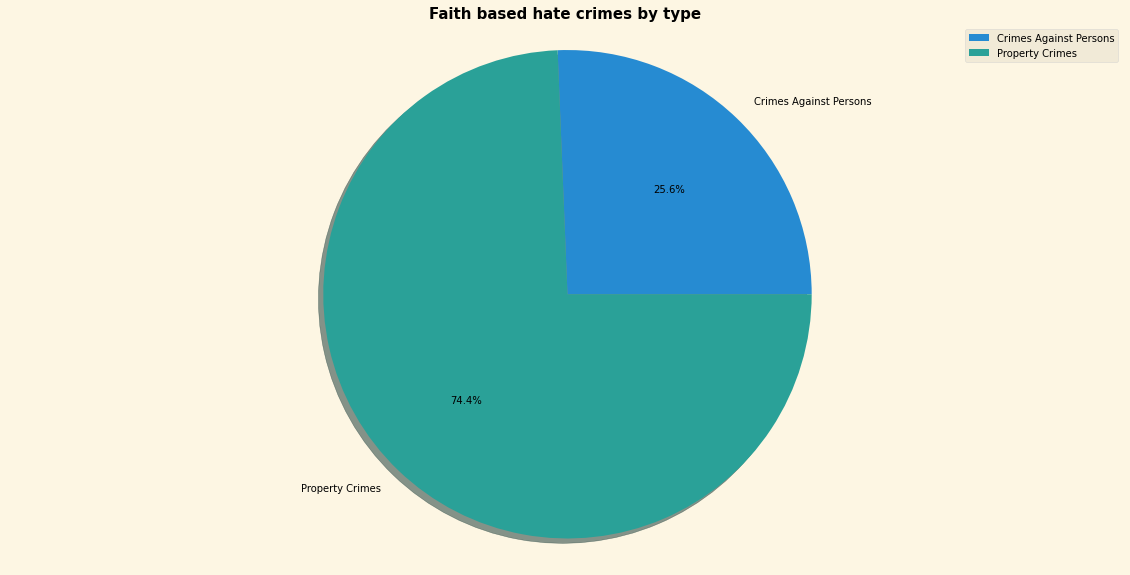

In [9]:
f = ny[['Crime Type','Anti-Jewish','Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Atheism/Agnosticism',
       'Anti-Religious Practice Generally', 'Anti-Other Religion',
       'Anti-Buddhist', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Other Christian', 'Anti-Sikh']].groupby('Crime Type').sum().drop(index ='Recode Me').sum(axis=1)
labels = list(f.keys())
sizes = list(f)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Faith based hate crimes by type", fontsize = 15, fontweight="bold")
plt.show()

<AxesSubplot:title={'center':'NY Hate crimes by Faith and Year'}, xlabel='Year'>

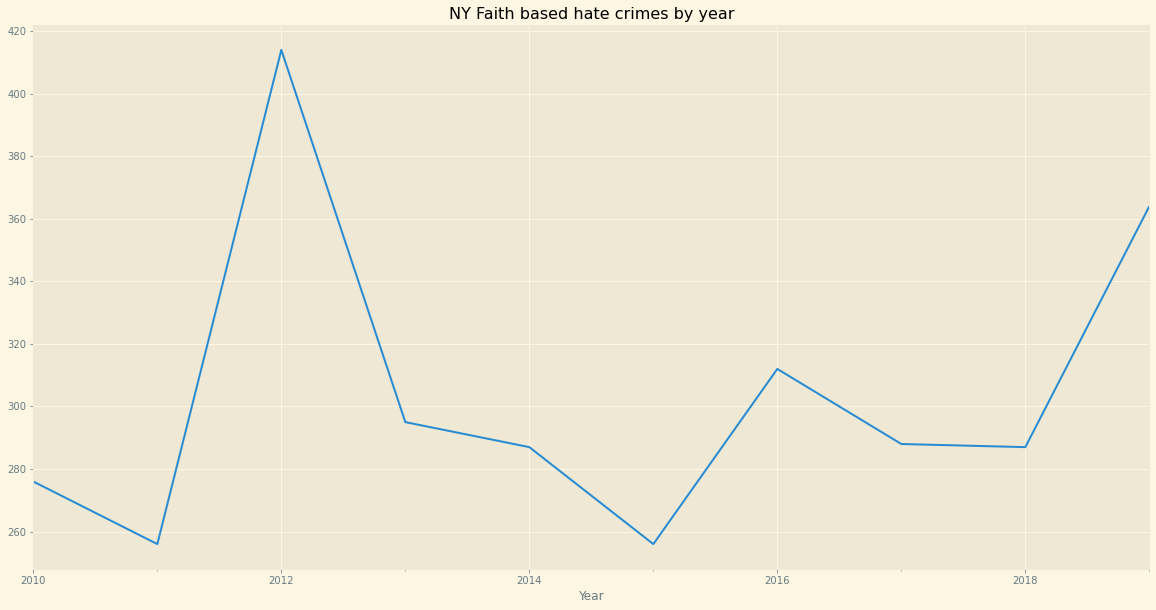

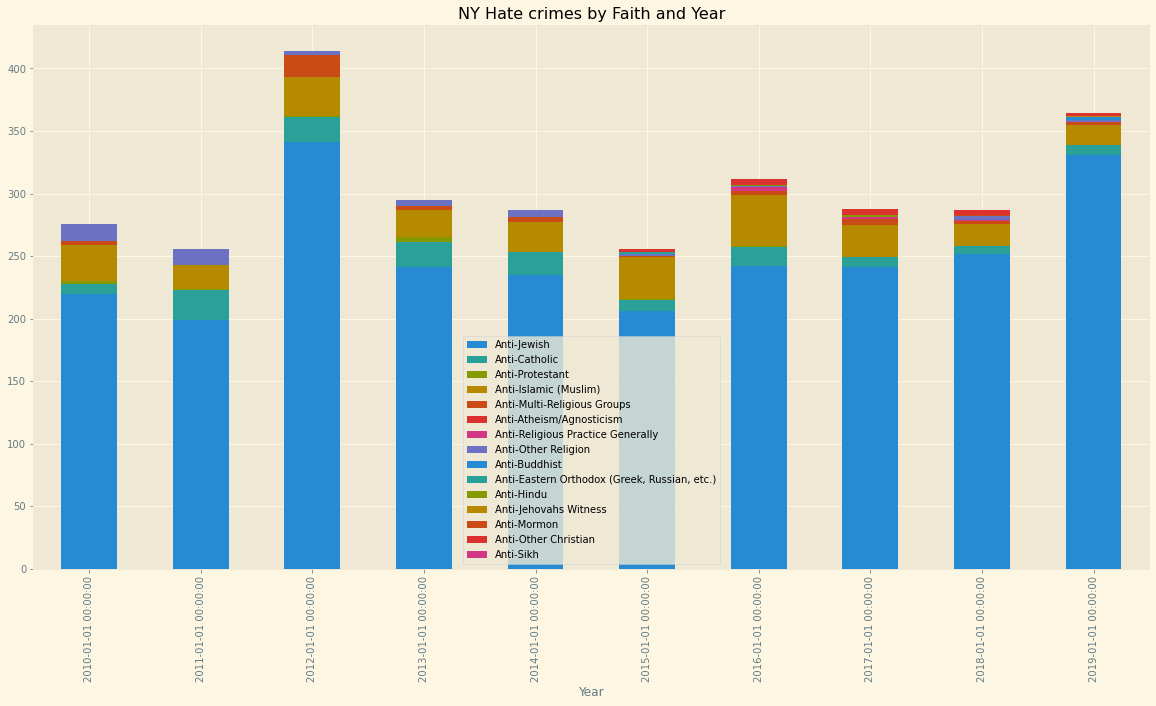

In [10]:
ny[['Year','Anti-Jewish','Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Atheism/Agnosticism',
       'Anti-Religious Practice Generally', 'Anti-Other Religion',
       'Anti-Buddhist', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Other Christian', 'Anti-Sikh']].groupby('Year').sum().sum(axis=1).plot(kind = 'line', figsize = (20,10), title = "NY Faith based hate crimes by year")
ny[['Year','Anti-Jewish','Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Atheism/Agnosticism',
       'Anti-Religious Practice Generally', 'Anti-Other Religion',
       'Anti-Buddhist', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Jehovahs Witness', 'Anti-Mormon',
       'Anti-Other Christian', 'Anti-Sikh']].groupby('Year').sum().plot(kind = 'bar', figsize = (20,10), legend = True, stacked=True, title = "NY Hate crimes by Faith and Year")

# Race Based Hate Crimes

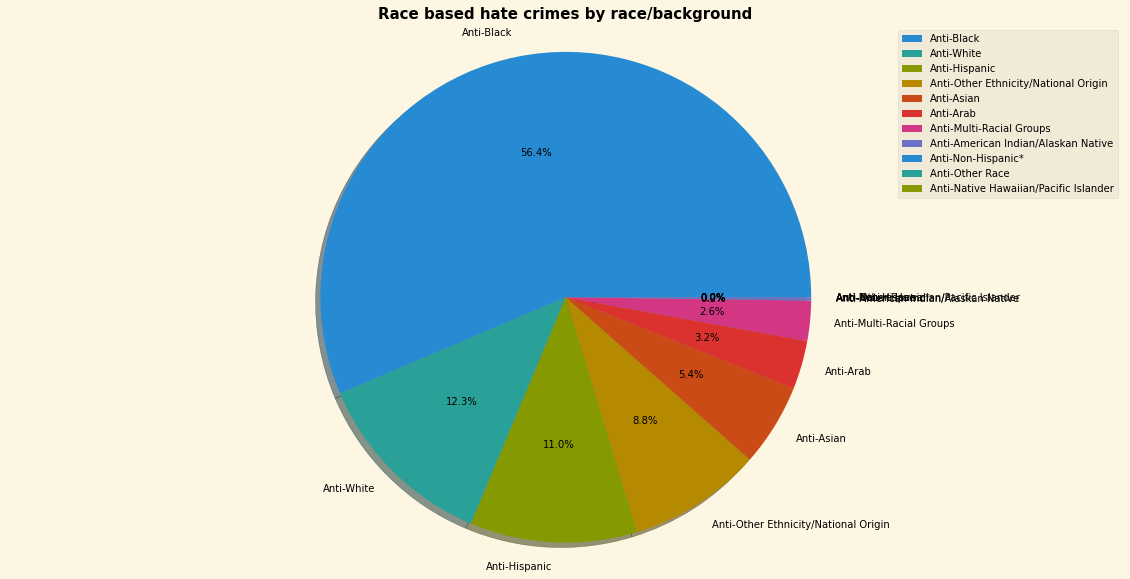

In [11]:
black = ny[['Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Native Hawaiian/Pacific Islander',
       'Anti-Multi-Racial Groups', 'Anti-Other Race','Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Non-Hispanic*']].sum().sort_values(ascending =  False)
labels = list(black.keys())
sizes = list(black)
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Race based hate crimes by race/background", fontsize = 15, fontweight="bold")
plt.show()

### In contrast to the total hate crimes trend to be mostly against property, Race based hate crimes recorded higher attacks against Persons

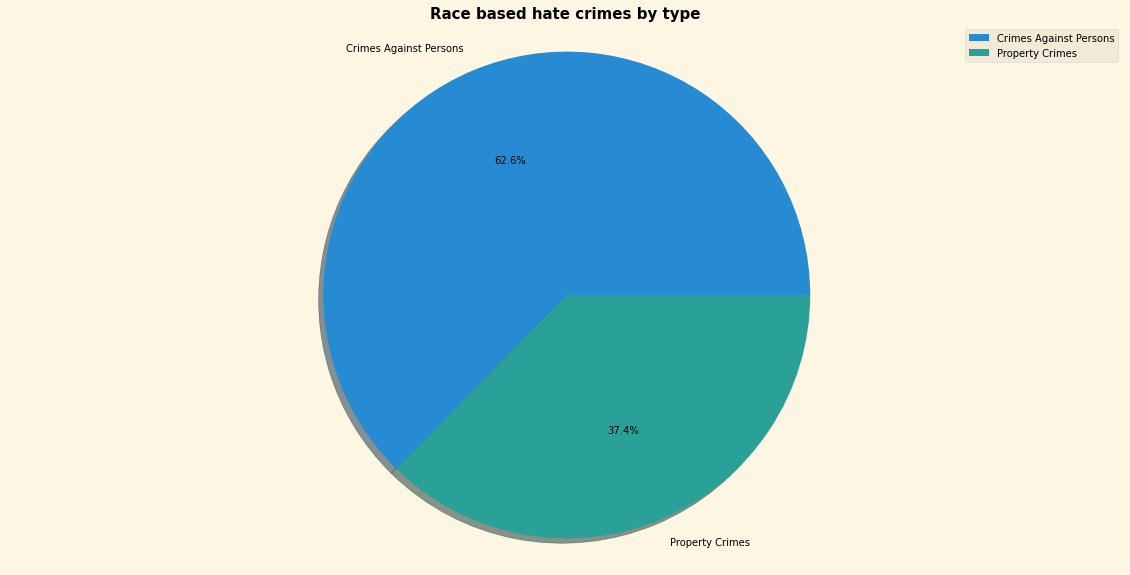

In [12]:
m =ny[[ 'Crime Type','Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Native Hawaiian/Pacific Islander',
       'Anti-Multi-Racial Groups', 'Anti-Other Race','Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Non-Hispanic*']].groupby('Crime Type').sum().drop(index ='Recode Me').sum(axis=1)
labels = list(m.keys())
sizes = list(m)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Race based hate crimes by type", fontsize = 15, fontweight="bold")
plt.show()

<AxesSubplot:title={'center':'NY Race based hate crimes by year'}, xlabel='Year'>

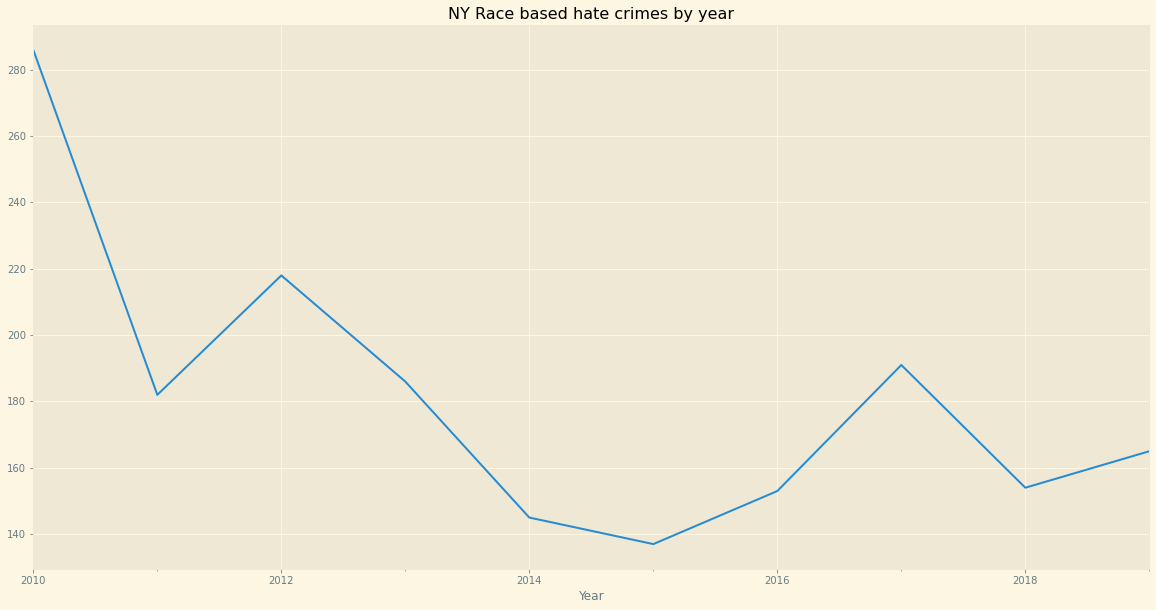

In [13]:
ny[[ 'Year','Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Native Hawaiian/Pacific Islander',
       'Anti-Multi-Racial Groups', 'Anti-Other Race','Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Non-Hispanic*']].groupby('Year').sum().sum(axis=1).plot(kind = 'line', figsize = (20,10), title = "NY Race based hate crimes by year")

## While the numbers of recorded hate crimes vary throughout the years, the majority of victims every year identifies as Black/African American

<AxesSubplot:title={'center':'NY Hate crimes by Race and Year'}, xlabel='Year'>

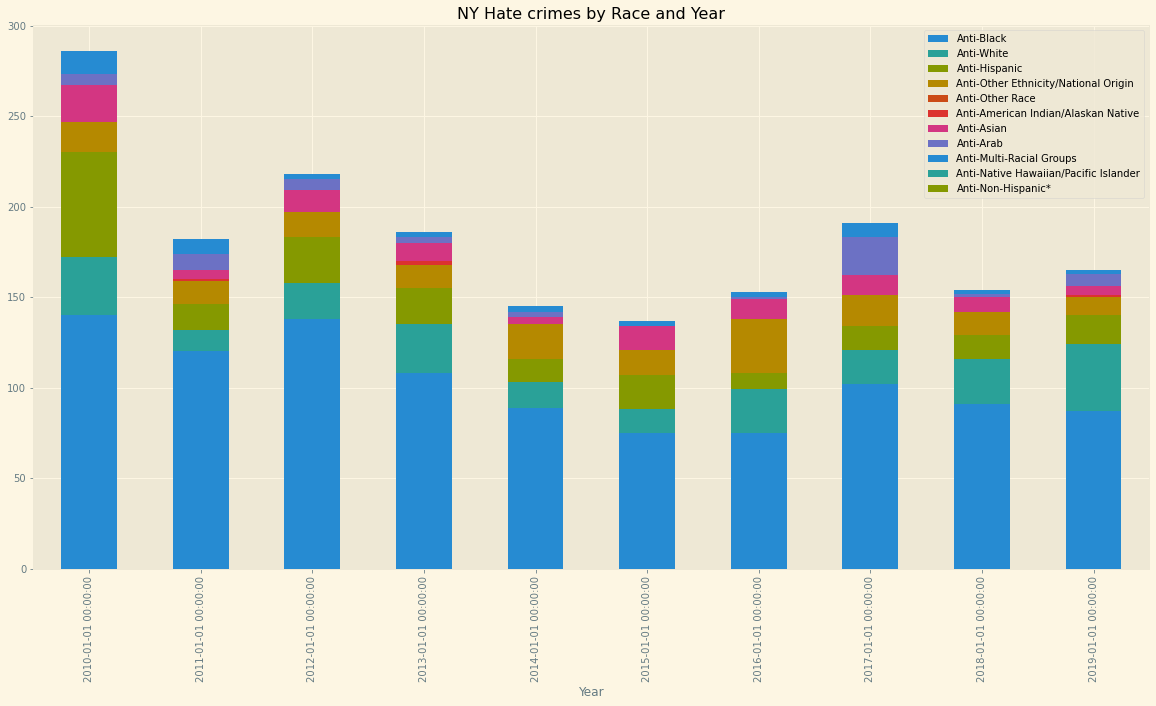

In [14]:
ny[[ 'Year','Anti-Black','Anti-White', 'Anti-Hispanic', 'Anti-Other Ethnicity/National Origin',
    'Anti-Other Race','Anti-American Indian/Alaskan Native', 'Anti-Asian','Anti-Arab','Anti-Multi-Racial Groups',
    'Anti-Native Hawaiian/Pacific Islander', 'Anti-Non-Hispanic*']].groupby('Year').sum().plot(kind = 'bar', figsize = (20,10), legend = True, stacked=True, title = "NY Hate crimes by Race and Year")


## In total, victims from Black/African American bacground were more than victims from all other races/backgrounds.

# Sexual Orientation  Based Hate Crimes

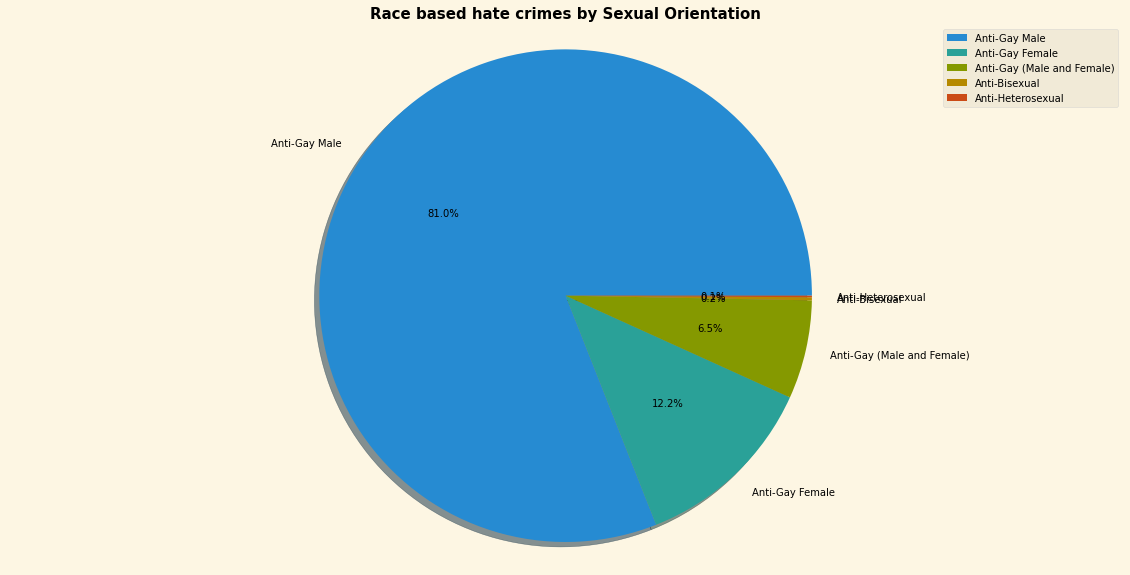

In [15]:
sexual = ny[['Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual']].sum().sort_values(ascending =  False)
labels = list(sexual.keys())
sizes = list(sexual)
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Race based hate crimes by Sexual Orientation", fontsize = 15, fontweight="bold")
plt.show()

## 84.1% of this type of hate crimes were against persons.

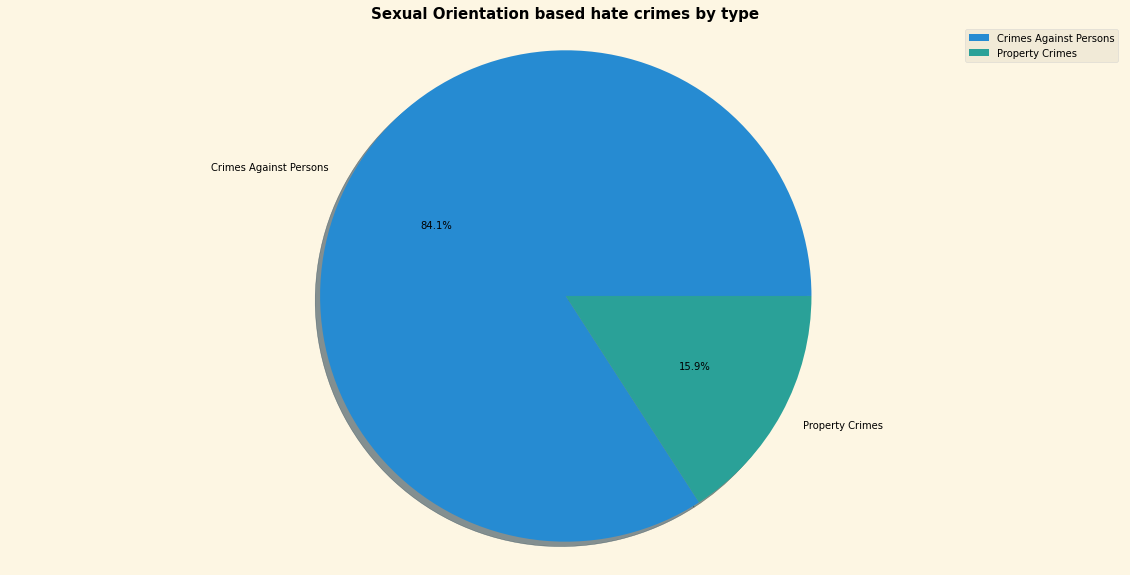

In [16]:
s = ny[['Crime Type','Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual']].groupby('Crime Type').sum().drop(index ='Recode Me').sum(axis=1)
labels = list(s.keys())
sizes = list(s)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Sexual Orientation based hate crimes by type", fontsize = 15, fontweight="bold")
plt.show()

<AxesSubplot:title={'center':'NY Sexual Orientation based hate crimes by year'}, xlabel='Year'>

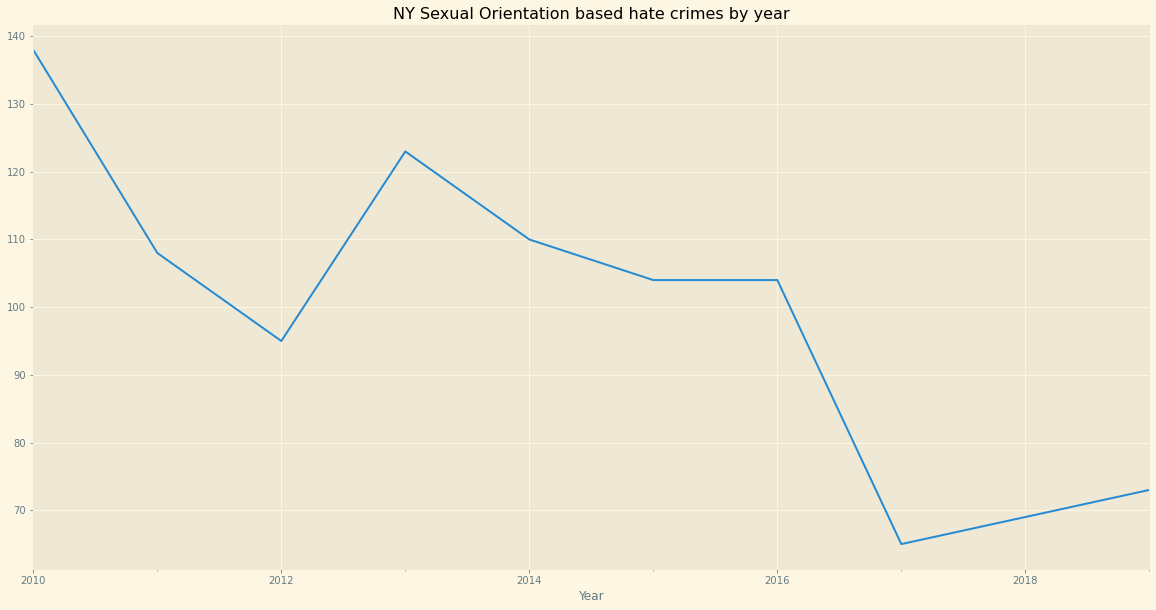

In [17]:
ny[['Year','Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual']].groupby('Year').sum().sum(axis=1).plot(kind = 'line',figsize = (20,10), title = "NY Sexual Orientation based hate crimes by year")

<AxesSubplot:title={'center':'NY Sexual Orientation crimes by Race and Year'}, xlabel='Year'>

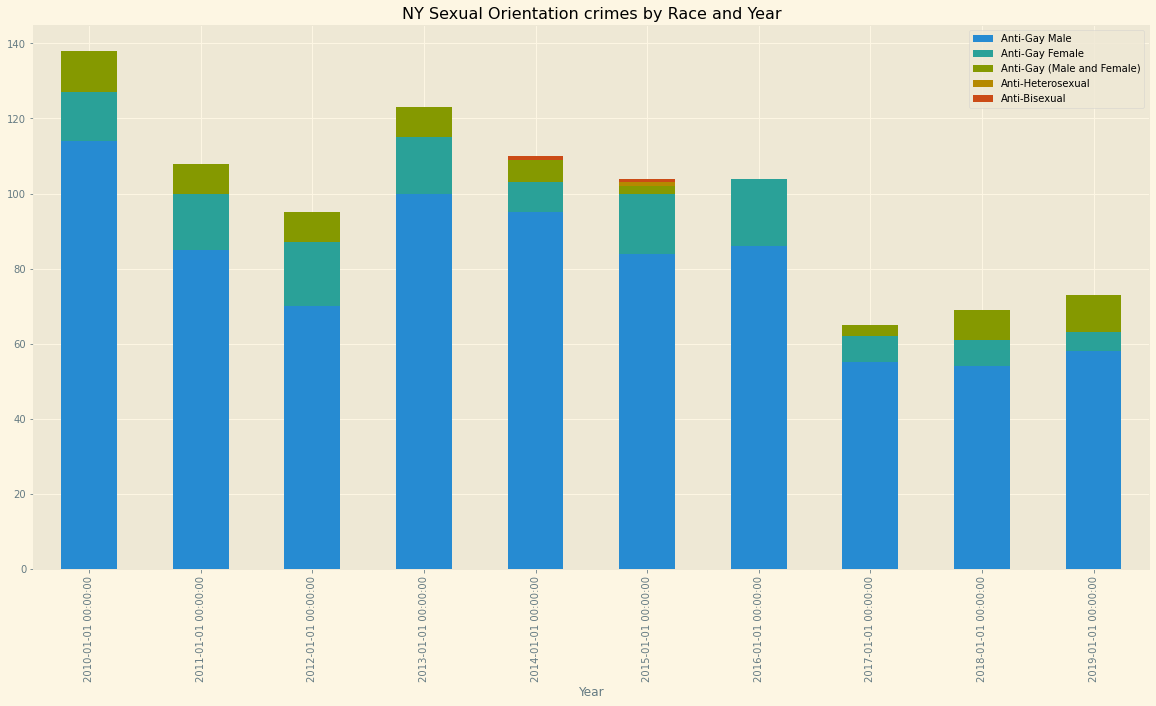

In [18]:
ny[['Year','Anti-Gay Male', 'Anti-Gay Female', 'Anti-Gay (Male and Female)',
       'Anti-Heterosexual', 'Anti-Bisexual']].groupby('Year').sum().plot(kind = 'bar', figsize = (20,10), legend = True, stacked=True, title = "NY Sexual Orientation crimes by Race and Year")

## Gender Based Hate Crimes

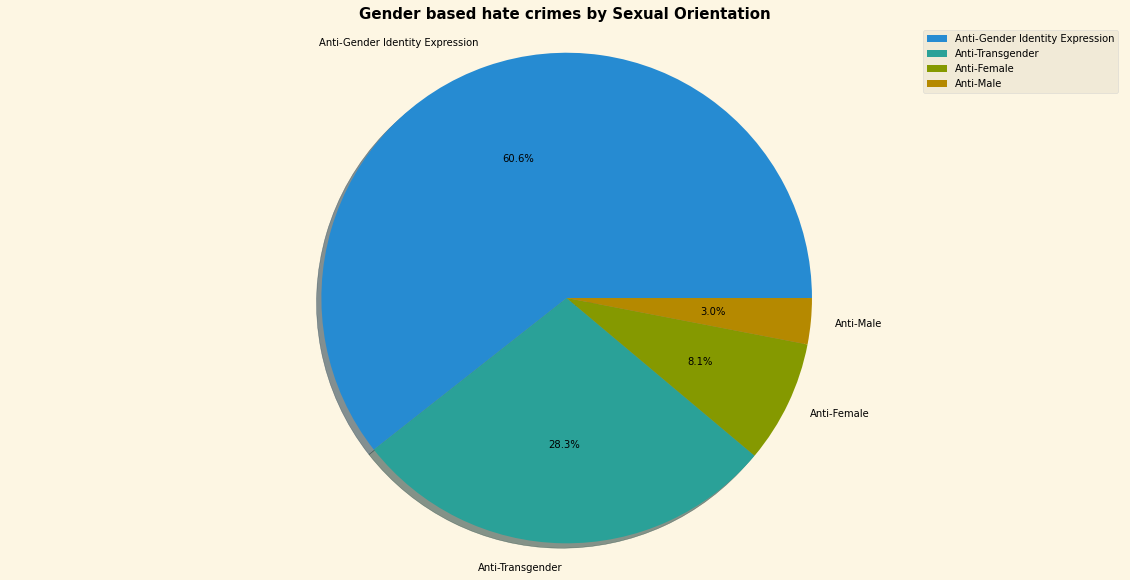

In [19]:
gender = ny[['Anti-Male', 'Anti-Female',
       'Anti-Transgender','Anti-Gender Identity Expression']].sum().sort_values(ascending =  False)
labels = list(gender.keys())
sizes = list(gender)
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Gender based hate crimes by Sexual Orientation", fontsize = 15, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Gender based hate crimes by type')

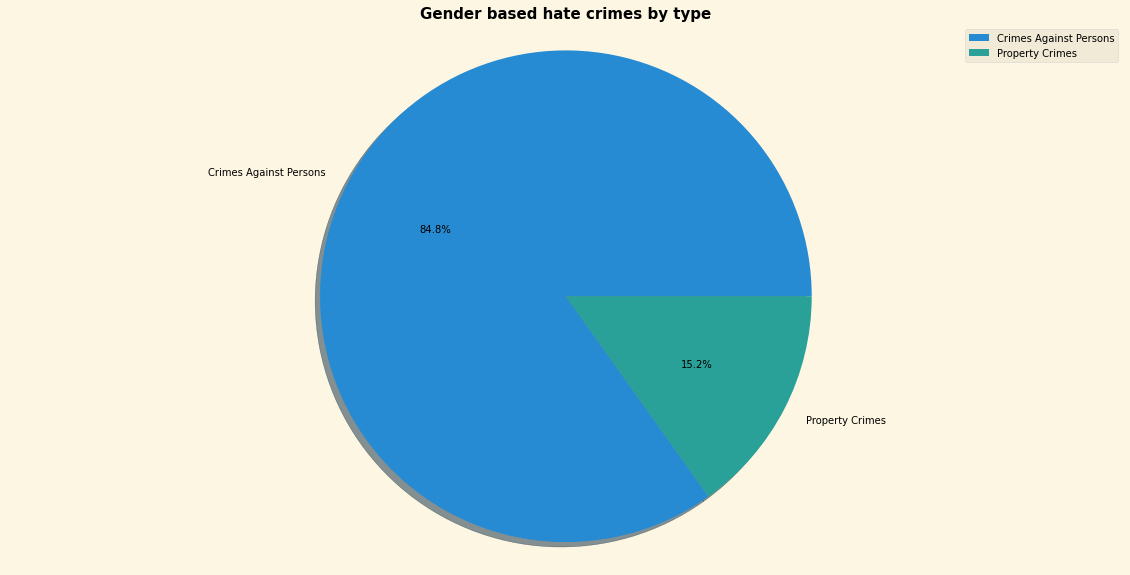

In [20]:
g= ny[['County', 'Year', 'Crime Type','Anti-Male', 'Anti-Female',
       'Anti-Transgender','Anti-Gender Identity Expression']].groupby('Crime Type').sum().drop(index ='Recode Me').sum(axis=1)
labels = list(g.keys())
sizes = list(g)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Gender based hate crimes by type", fontsize = 15, fontweight="bold")

<AxesSubplot:title={'center':'NY Hate crimes by Gender and Year'}, xlabel='Year'>

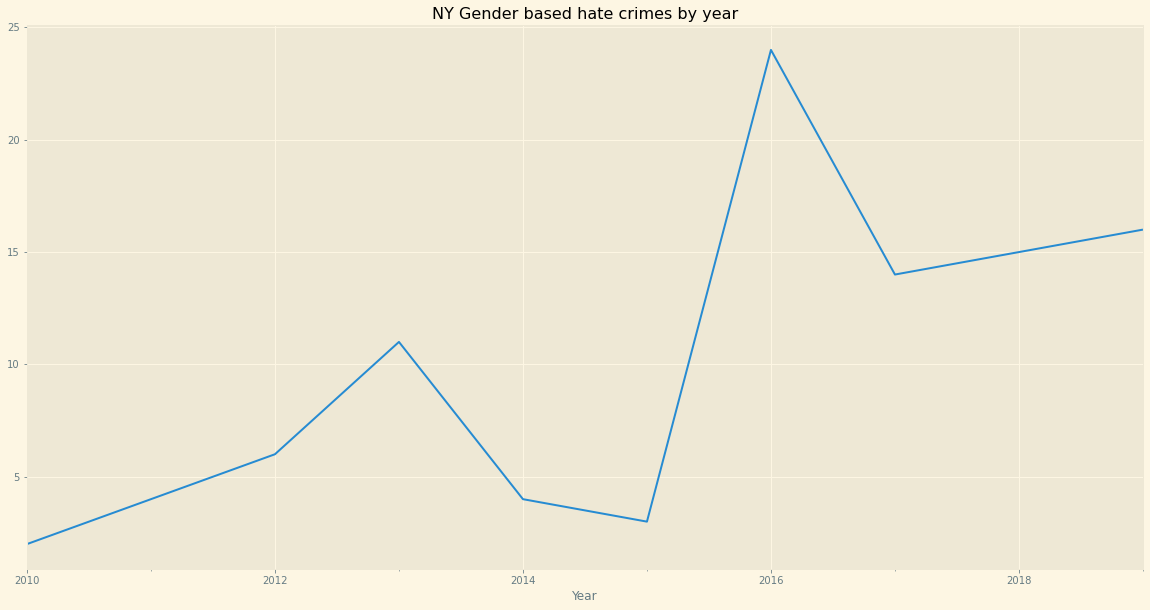

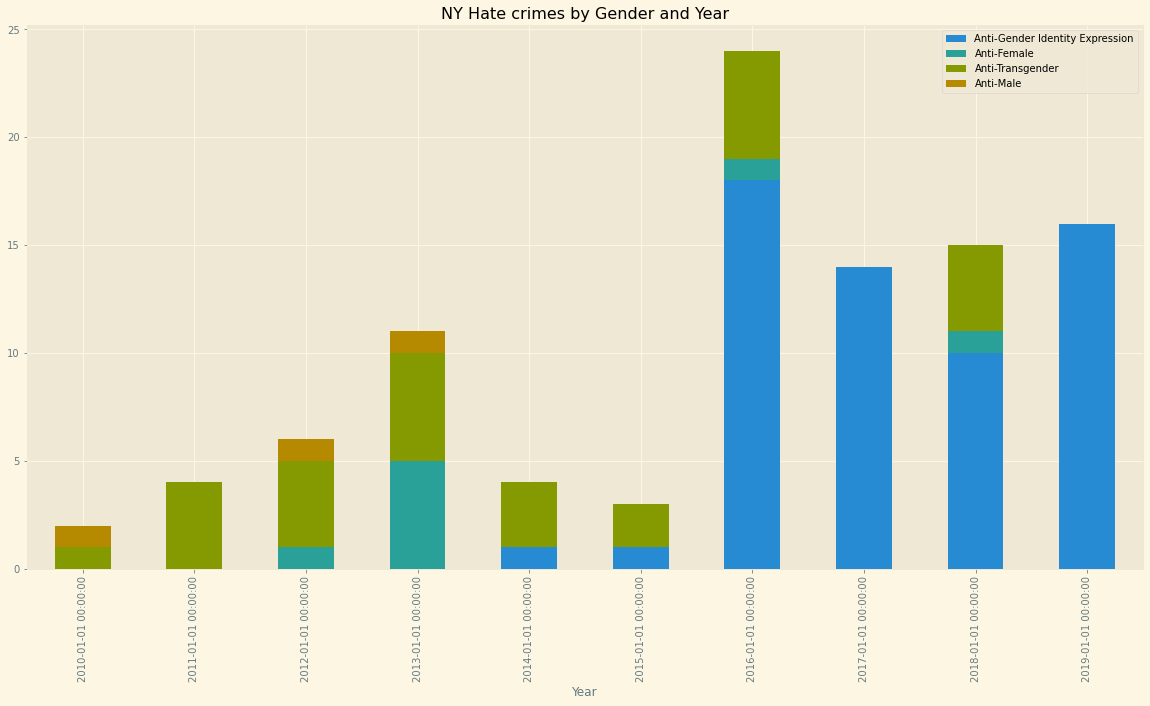

In [21]:
ny[['Year', 'Crime Type','Anti-Male', 'Anti-Female',
       'Anti-Transgender','Anti-Gender Identity Expression']].groupby('Year').sum().sum(axis=1).plot(kind = 'line', figsize = (20,10), title = "NY Gender based hate crimes by year")
ny[['Year', 'Crime Type','Anti-Gender Identity Expression', 'Anti-Female','Anti-Transgender','Anti-Male']].groupby('Year').sum().plot(kind = 'bar', figsize = (20,10), legend = True, stacked=True, title = "NY Hate crimes by Gender and Year")



# Other

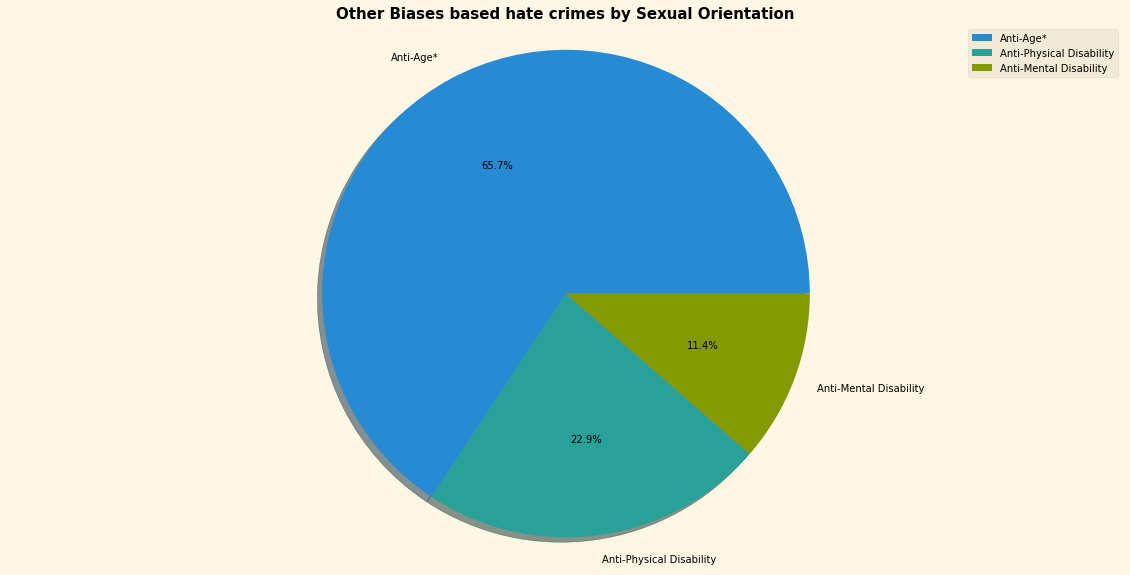

In [22]:
other = ny[['Anti-Age*','Anti-Physical Disability',
       'Anti-Mental Disability']].sum().sort_values(ascending =  False)
labels = list(other.keys())
sizes = list(other)
fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Other Biases based hate crimes by Sexual Orientation", fontsize = 15, fontweight="bold")
plt.show()

Text(0.5, 1.0, 'Other Biases based hate crimes by type')

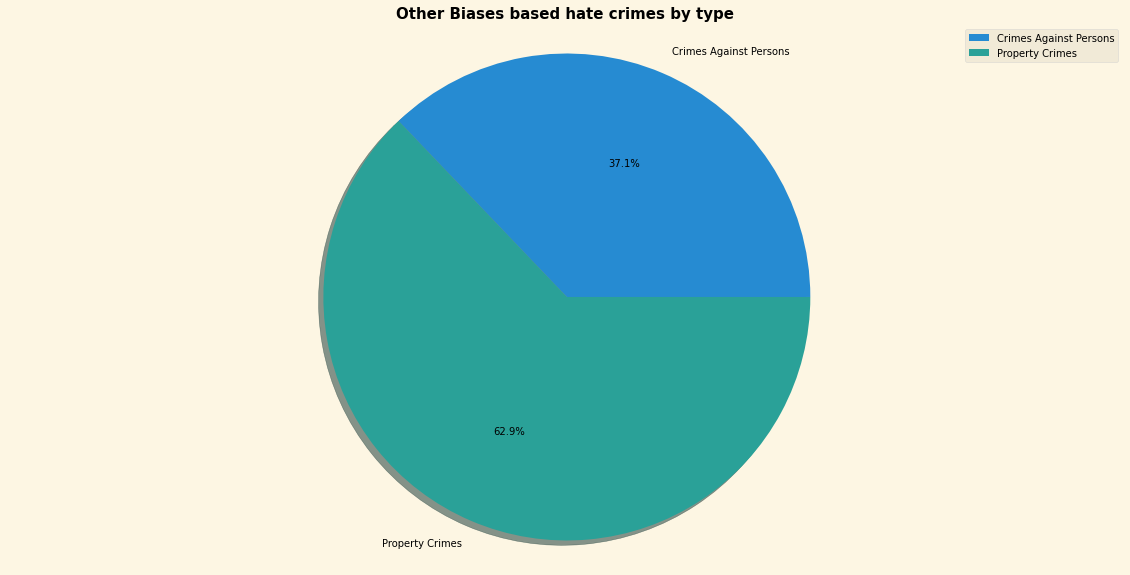

In [23]:
o= ny[['County', 'Year', 'Crime Type', 'Anti-Age*','Anti-Physical Disability',
       'Anti-Mental Disability']].groupby('Crime Type').sum().drop(index ='Recode Me').sum(axis=1)
labels = list(o.keys())
sizes = list(o)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(sizes, labels=labels,
        shadow=True, autopct='%1.1f%%')
ax1.axis('equal')
plt.legend()
plt.title("Other Biases based hate crimes by type", fontsize = 15, fontweight="bold")

<AxesSubplot:title={'center':'NY Hate crimes by Other Biases and Year'}, xlabel='Year'>

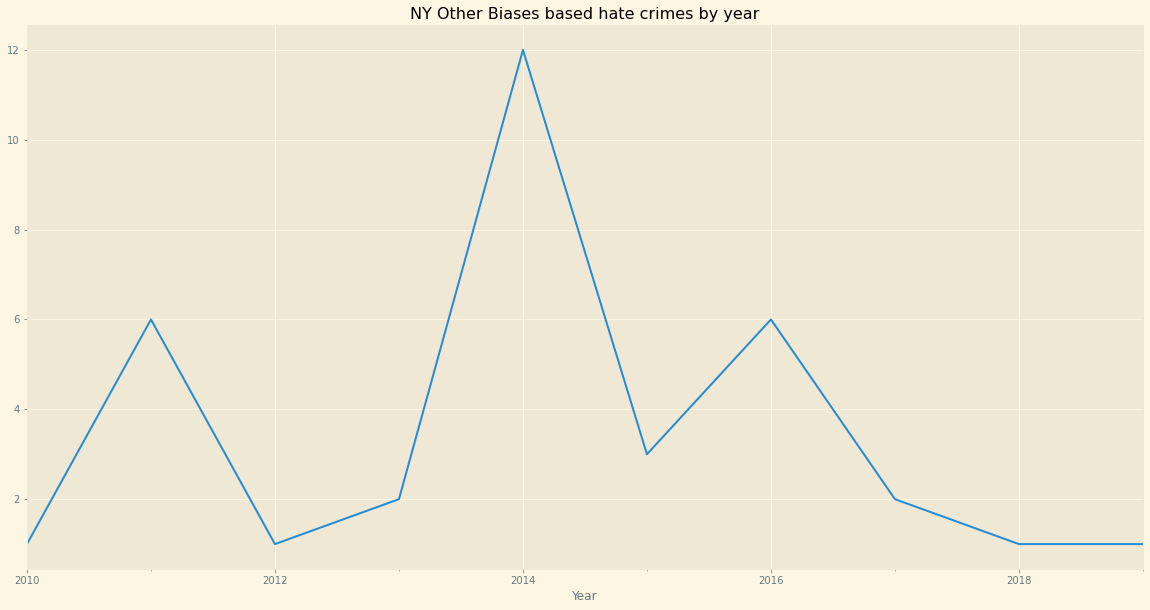

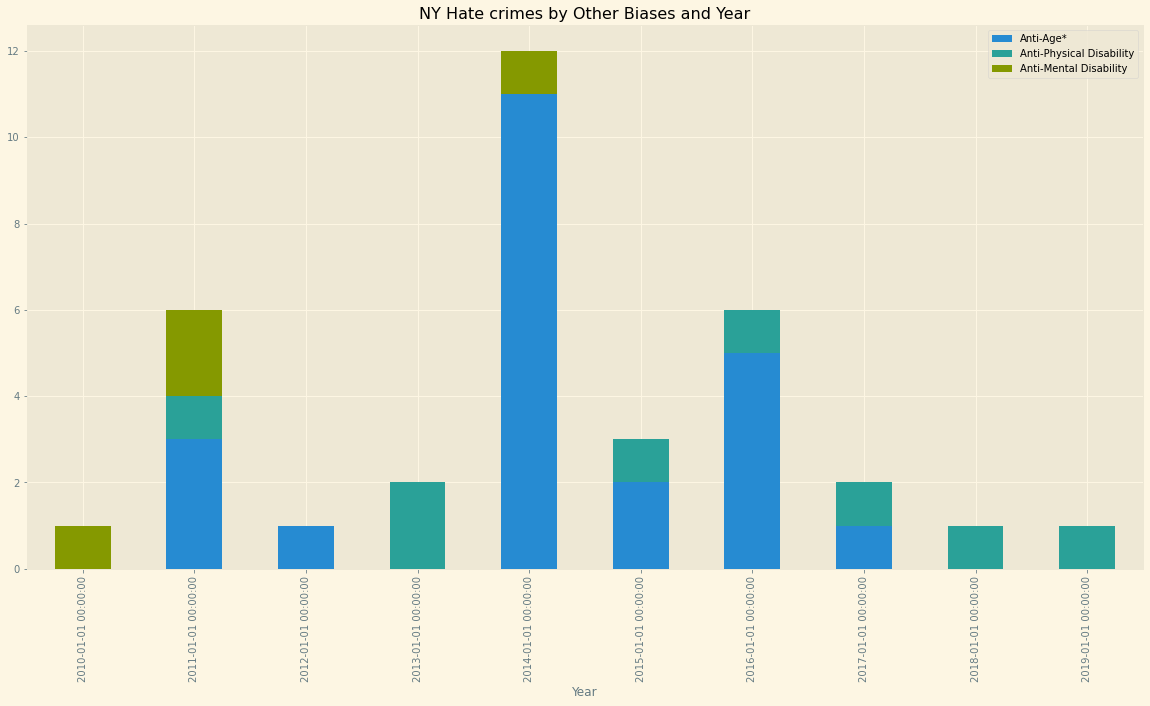

In [24]:
ny[['Year', 'Crime Type', 'Anti-Age*','Anti-Physical Disability',
       'Anti-Mental Disability']].groupby('Year').sum().sum(axis=1).plot(kind = 'line',figsize = (20,10), title = "NY Other Biases based hate crimes by year")

ny[['Year', 'Crime Type', 'Anti-Age*','Anti-Physical Disability',
       'Anti-Mental Disability']].groupby('Year').sum().plot(kind = 'bar', figsize = (20,10), legend = True, stacked=True, title = "NY Hate crimes by Other Biases and Year")



